In [64]:
# Inflation

In [65]:
# https://www.destatis.de/DE/Themen/Wirtschaft/Preise/Verbraucherpreisindex/Tabellen/Verbraucherpreise-12Kategorien.html

In [66]:
from matplotlib import pyplot as plt
import pandas as pd
import os
from datetime import datetime
from datetime import date  # todays date
from matplotlib.ticker import FuncFormatter

In [67]:
# import

In [68]:
pfad = str(os.path.abspath(os.getcwd()))+ "\\"
size = 30
today = date.today().strftime("%d.%m.%Y")
titel0 = 'Inflation'
indexart = 'Verbraucherpreisindex'
print(pfad)

D:\Github\Aktien\Inflation\


In [69]:
df = pd.read_excel(pfad+"Input_Verbraucherpreise.xlsx")
df

,Datum,Gesamt,Nahrungsmittel (01),"Alkohol, Tabak (02)",Kleidung (03),"Wohnung, Wasser, Strom, Gas, Brennstoffe (04)","Möbel, Haushaltsgeräte (05)",Gesundheit (06),Verkehr (07),"Post, Telekommunikation (08)","Freizeit, Unterhaltung, Kultur (09)",Bildung (10),"Gaststätten, Beherbergung, Dienstleistungen (11)","Andere Waren, Dienstleistungen (12)"
0,2022-06-01,117.4,126.5,122.4,106.3,118.5,112.6,107.2,122.0,94.1,116.1,105.9,123.4,114.1
1,2022-05-01,117.3,125.3,121.4,107.9,117.4,111.6,107.0,130.0,94.2,111.4,105.9,121.7,113.9
2,2022-04-01,116.2,122.7,120.7,107.1,116.4,110.5,106.6,128.5,94.2,110.9,105.7,120.2,113.3
3,2022-03-01,115.3,118.8,119.7,105.8,116.6,109.4,106.7,129.9,94.2,106.5,105.7,118.8,112.8
4,2022-02-01,112.5,117.8,119.1,101.2,113.1,108.9,106.3,121.0,94.3,105.7,105.6,118.2,112.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2017-05-01,101.8,102.9,104.5,103.3,101.1,101.0,102.6,101.4,97.7,101.1,102.5,104.2,102.7
62,2017-04-01,101.8,102.9,104.0,104.0,101.1,101.0,102.4,102.0,97.9,100.7,102.4,103.8,102.6
63,2017-03-01,101.4,103.4,103.1,103.8,100.9,101.1,102.3,101.3,98.0,98.5,102.4,103.4,102.2
64,2017-02-01,101.2,105.2,103.1,97.4,100.9,100.9,102.0,101.6,98.2,97.7,102.3,103.2,102.0


In [70]:
print(df.columns)

Index(['Datum', 'Gesamt', 'Nahrungsmittel (01)', 'Alkohol, Tabak (02)',
       'Kleidung (03)', 'Wohnung, Wasser, Strom, Gas, Brennstoffe (04)',
       'Möbel, Haushaltsgeräte (05)', 'Gesundheit (06)', 'Verkehr (07)',
       'Post, Telekommunikation (08)', 'Freizeit, Unterhaltung, Kultur (09)',
       'Bildung (10)', 'Gaststätten, Beherbergung, Dienstleistungen (11)',
       'Andere Waren, Dienstleistungen (12)'],
      dtype='object')


In [71]:
df = pd.read_excel(pfad+"Input.xlsx")
df.rename(columns = {
    'Gesamt':'Gesamt', 
    'Nahrungsmittel (01)':'Nahrung',
    'Alkohol, Tabak (02)':'Alkohol_Tabak',
    'Kleidung (03)':'Kleidung',
    'Wohnung, Wasser, Strom, Gas, Brennstoffe (04)':'Wohnen',
    'Möbel, Haushaltsgeräte (05)':'Haushalt',
    'Gesundheit (06)':'Gesundheit',
    'Verkehr (07)':'Verkehr',
    'Post, Telekommunikation (08)':'Post_Internet',
    'Freizeit, Unterhaltung, Kultur (09)':'Freizeit',
    'Bildung (10)':'Bildung',
    'Gaststätten, Beherbergung, Dienstleistungen (11)':'Gastgewerbe',
    'Andere Waren, Dienstleistungen (12)':'andere_Waren_Dienstleistungen'}, 
    inplace = True)
df.head(2)

,Datum,Gesamt,Nahrung,Alkohol_Tabak,Kleidung,Wohnen,Haushalt,Gesundheit,Verkehr,Post_Internet,Freizeit,Bildung,Gastgewerbe,andere_Waren_Dienstleistungen
0,2022-06-01,117.4,126.5,122.4,106.3,118.5,112.6,107.2,122.0,94.1,116.1,105.9,123.4,114.1
1,2022-05-01,117.3,125.3,121.4,107.9,117.4,111.6,107.0,130.0,94.2,111.4,105.9,121.7,113.9


In [72]:
# # Iterate over two given columns only from the dataframe
# for column in df[['Nahrung', 'Alkohol_Tabak', 'Kleidung', 
#                   'Wohnen', 'Haushalt', 'Gesundheit', 'Verkehr', 
#                   'Post_Internet', 'Freizeit', 'Bildung', 'Gastgewerbe', 'andere_Waren_Dienstleistungen']]:
#     print(column)
#     df[f'{column}2'] = df['Gesamt'] - df[f'{column}']

Nahrung
Alkohol_Tabak
Kleidung
Wohnen
Haushalt
Gesundheit
Verkehr
Post_Internet
Freizeit
Bildung
Gastgewerbe
andere_Waren_Dienstleistungen


In [73]:
df.head(2)

,Datum,Gesamt,Nahrung,Alkohol_Tabak,Kleidung,Wohnen,Haushalt,Gesundheit,Verkehr,Post_Internet,...,Kleidung2,Wohnen2,Haushalt2,Gesundheit2,Verkehr2,Post_Internet2,Freizeit2,Bildung2,Gastgewerbe2,andere_Waren_Dienstleistungen2
0,2022-06-01,117.4,126.5,122.4,106.3,118.5,112.6,107.2,122.0,94.1,...,11.1,-1.1,4.8,10.2,-4.6,23.3,1.3,11.5,-6.0,3.3
1,2022-05-01,117.3,125.3,121.4,107.9,117.4,111.6,107.0,130.0,94.2,...,9.4,-0.1,5.7,10.3,-12.7,23.1,5.9,11.4,-4.4,3.4
2,2022-04-01,116.2,122.7,120.7,107.1,116.4,110.5,106.6,128.5,94.2,...,9.1,-0.2,5.7,9.6,-12.3,22.0,5.3,10.5,-4.0,2.9
3,2022-03-01,115.3,118.8,119.7,105.8,116.6,109.4,106.7,129.9,94.2,...,9.5,-1.3,5.9,8.6,-14.6,21.1,8.8,9.6,-3.5,2.5
4,2022-02-01,112.5,117.8,119.1,101.2,113.1,108.9,106.3,121.0,94.3,...,11.3,-0.6,3.6,6.2,-8.5,18.2,6.8,6.9,-5.7,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2017-05-01,101.8,102.9,104.5,103.3,101.1,101.0,102.6,101.4,97.7,...,-1.5,0.7,0.8,-0.8,0.4,4.1,0.7,-0.7,-2.4,-0.9
62,2017-04-01,101.8,102.9,104.0,104.0,101.1,101.0,102.4,102.0,97.9,...,-2.2,0.7,0.8,-0.6,-0.2,3.9,1.1,-0.6,-2.0,-0.8
63,2017-03-01,101.4,103.4,103.1,103.8,100.9,101.1,102.3,101.3,98.0,...,-2.4,0.5,0.3,-0.9,0.1,3.4,2.9,-1.0,-2.0,-0.8
64,2017-02-01,101.2,105.2,103.1,97.4,100.9,100.9,102.0,101.6,98.2,...,3.8,0.3,0.3,-0.8,-0.4,3.0,3.5,-1.1,-2.0,-0.8


Gesamt
Nahrung
Alkohol_Tabak
Kleidung
Wohnen
Haushalt
Gesundheit
Verkehr
Post_Internet
Freizeit
Bildung
Gastgewerbe
andere_Waren_Dienstleistungen


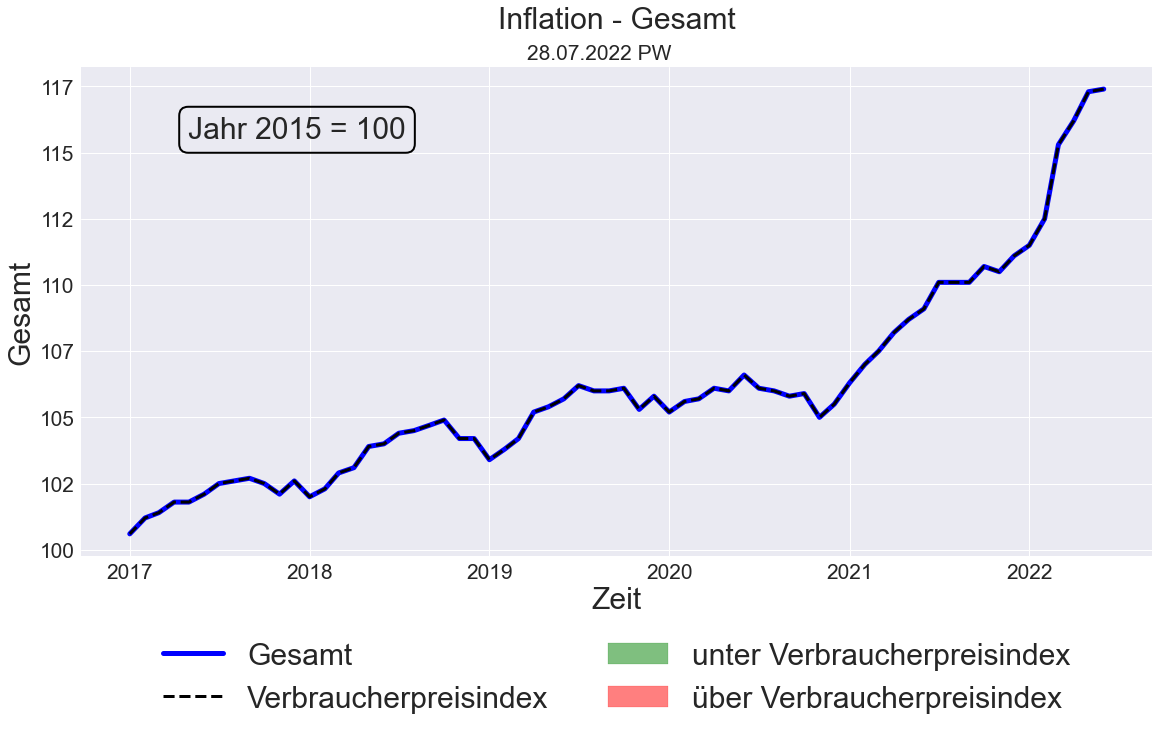

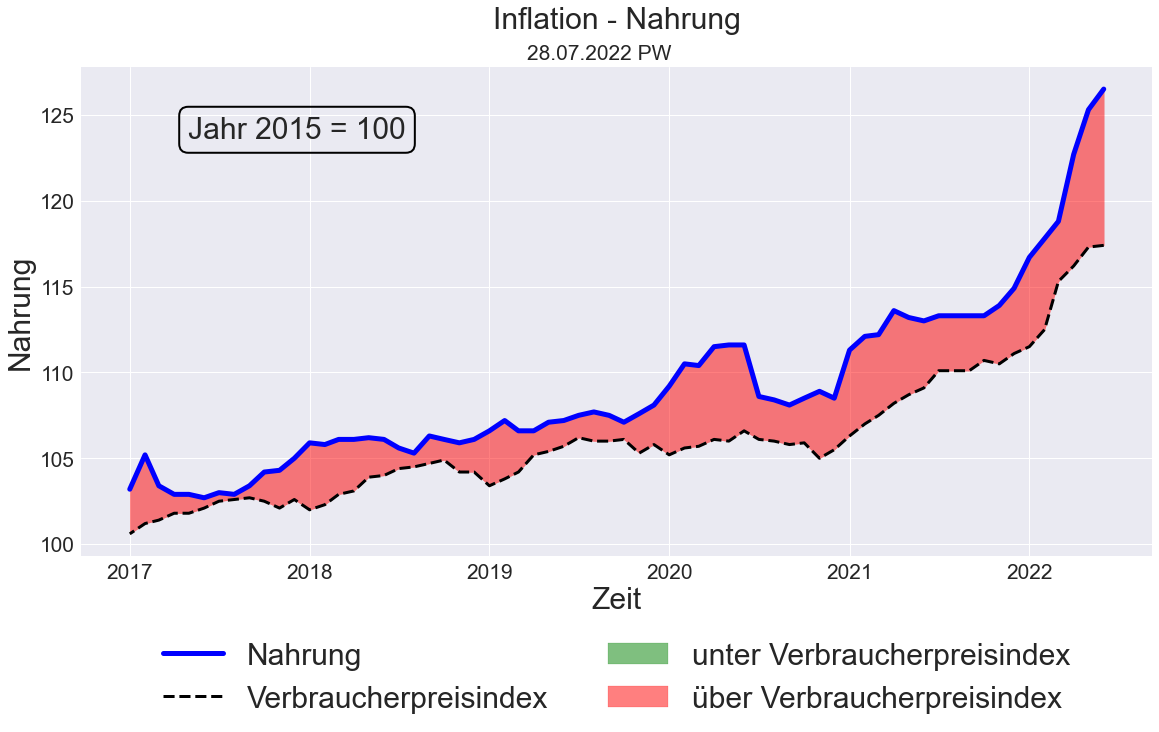

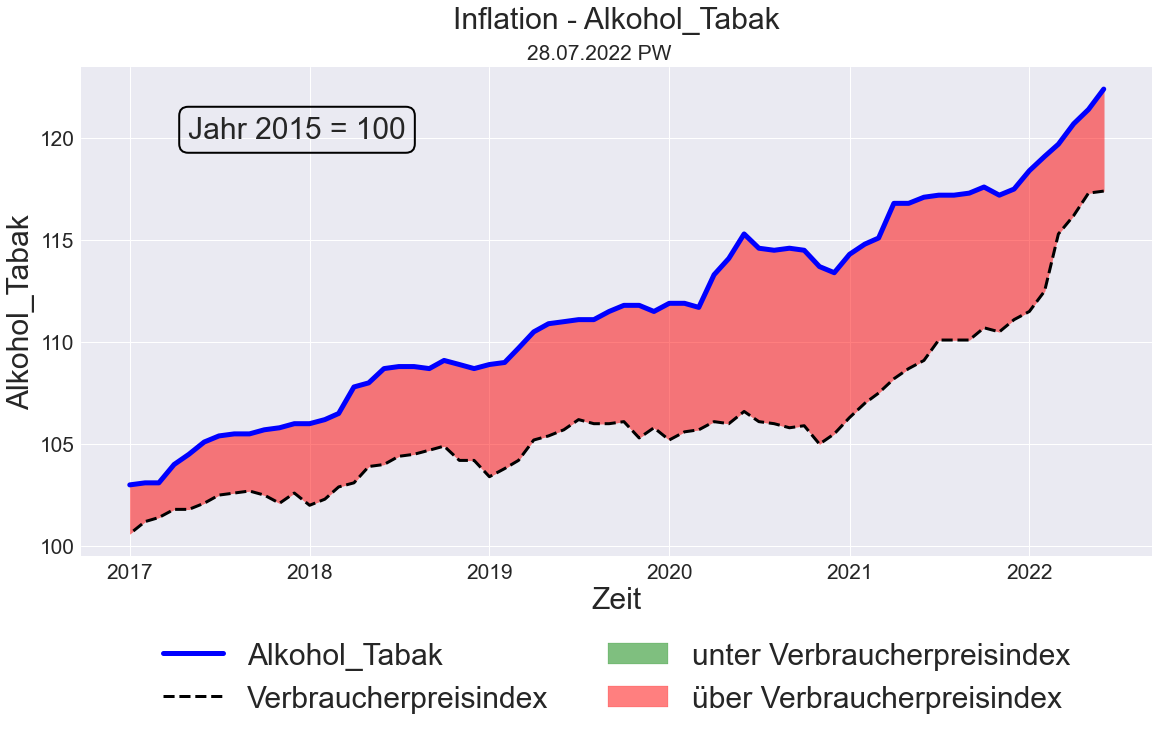

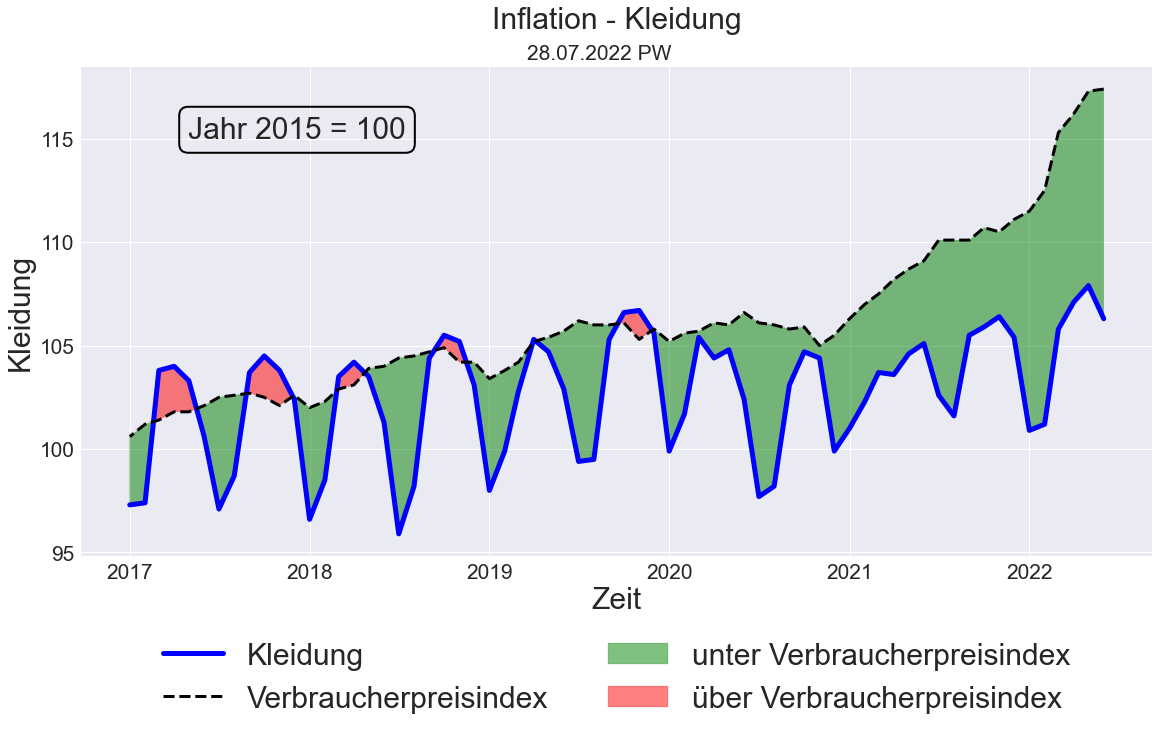

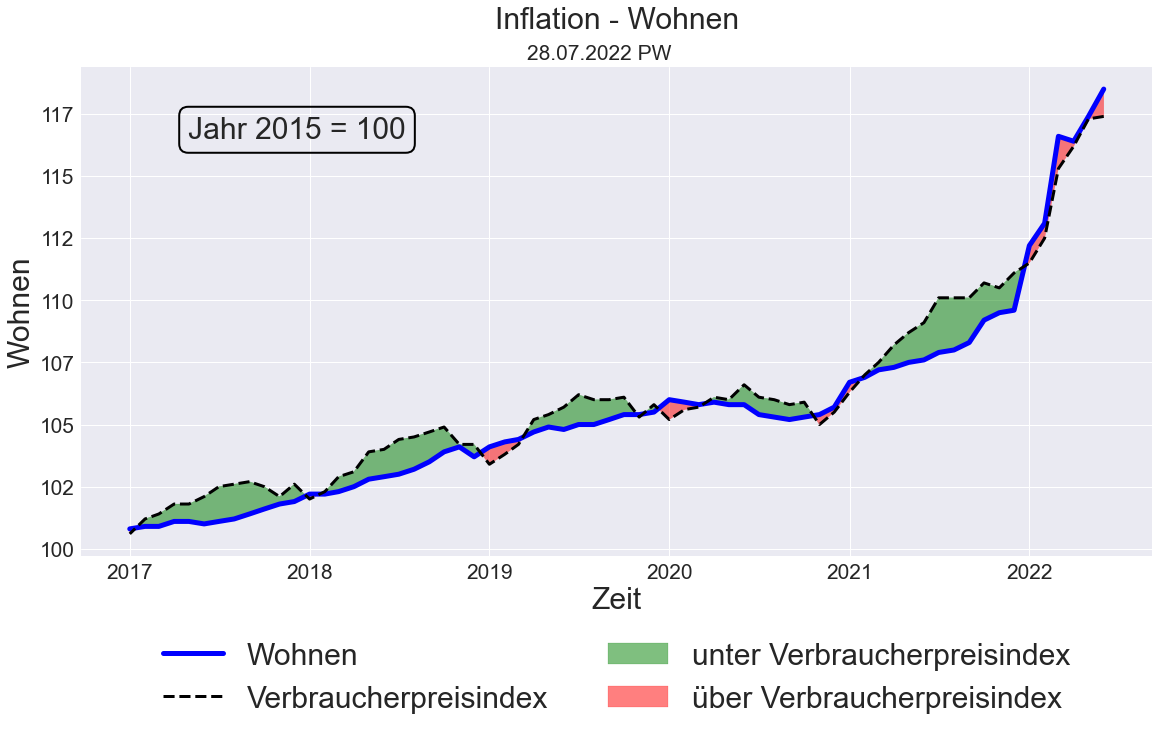

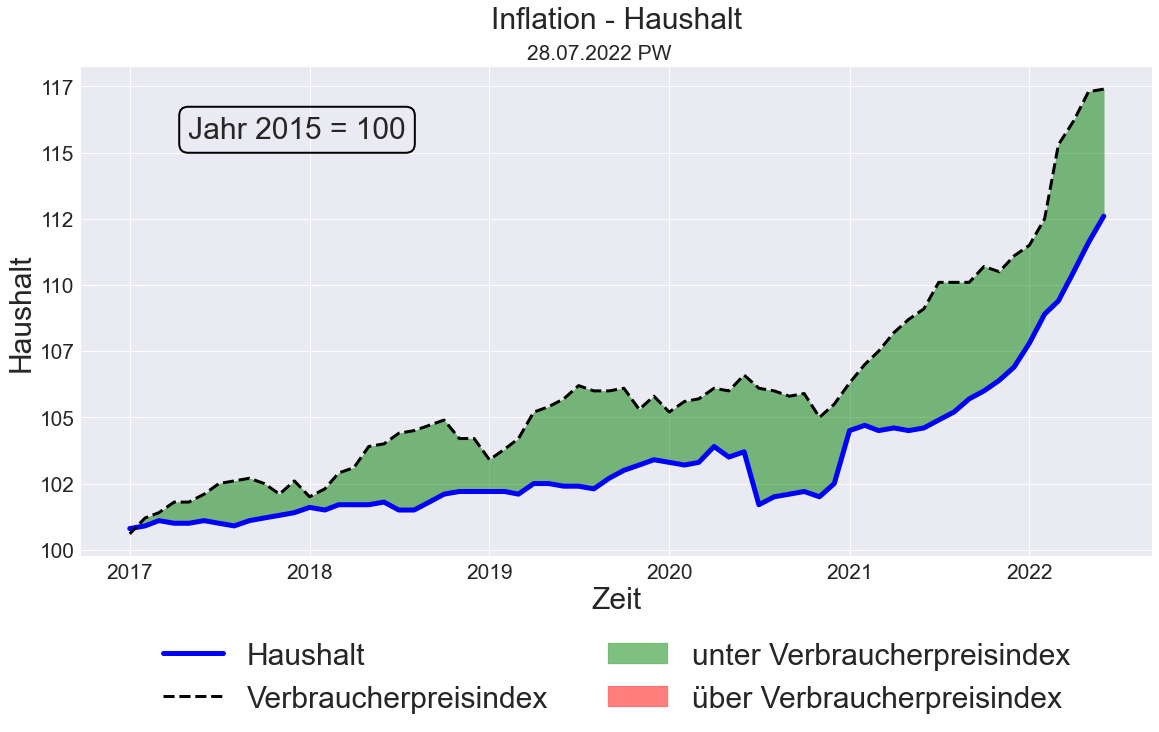

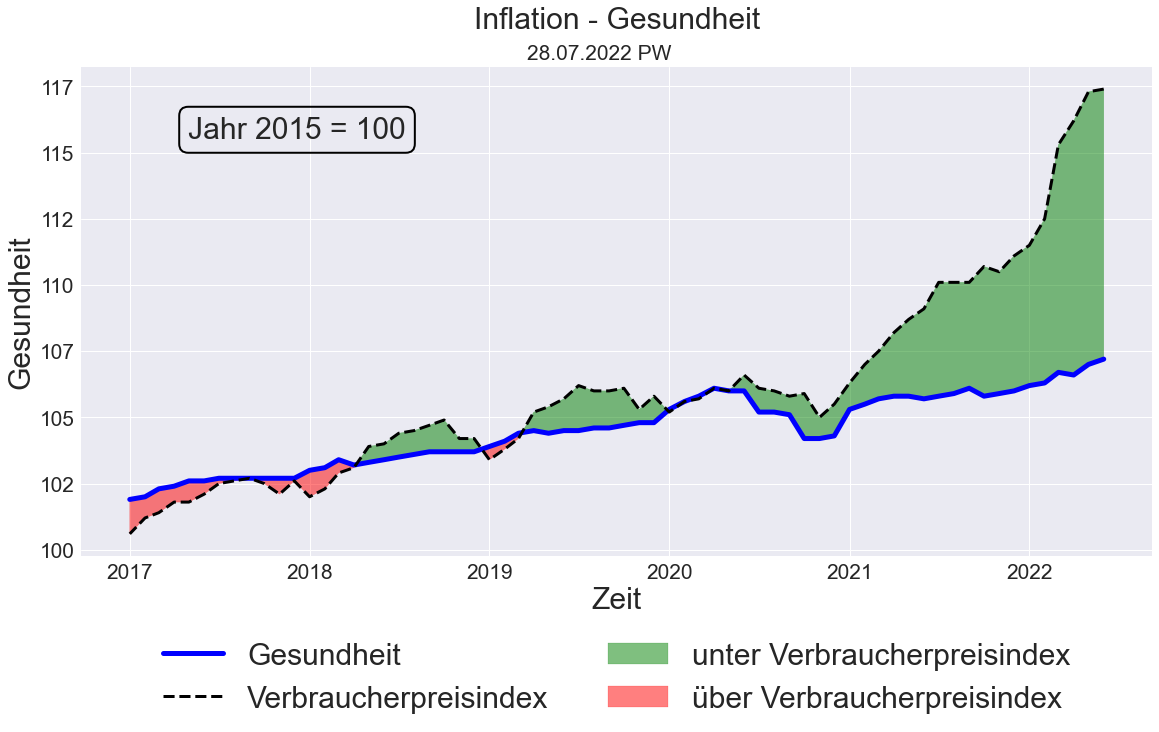

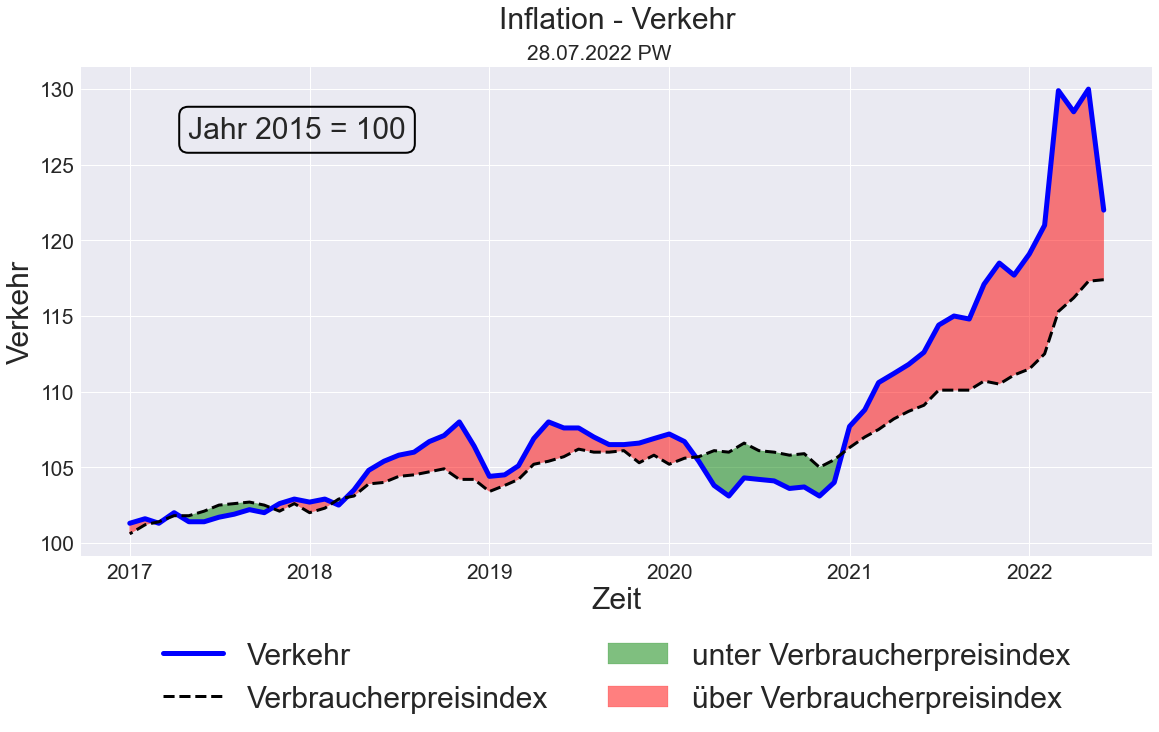

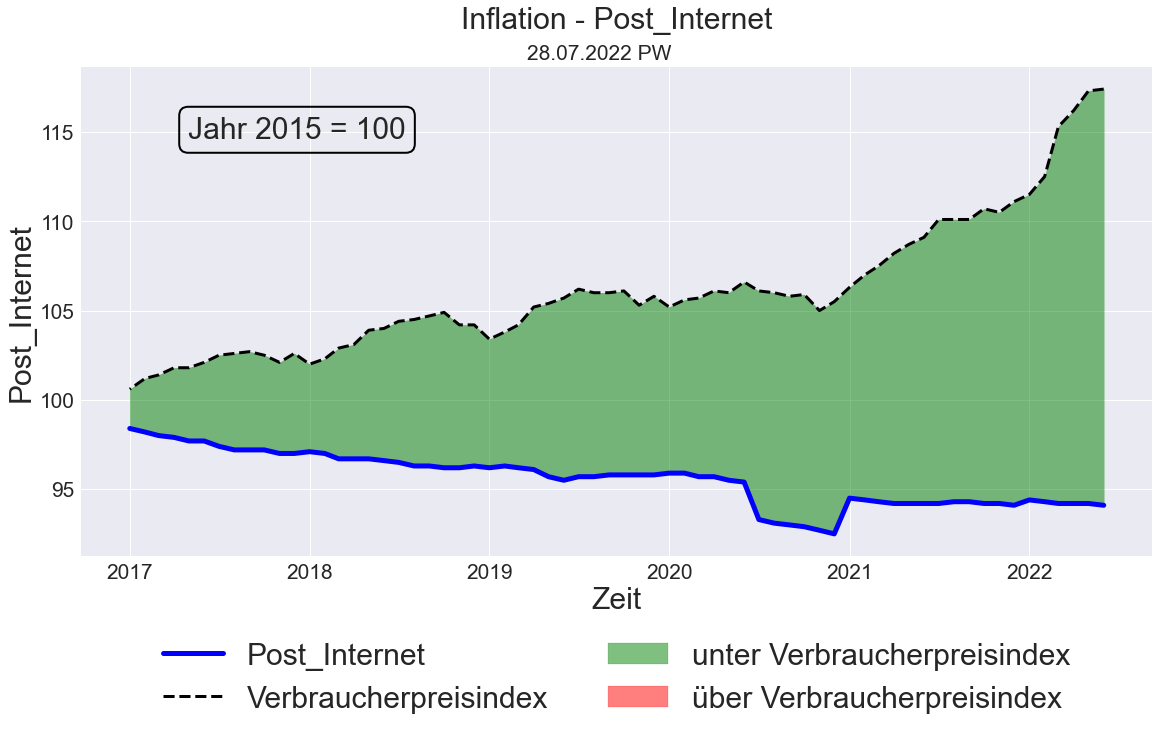

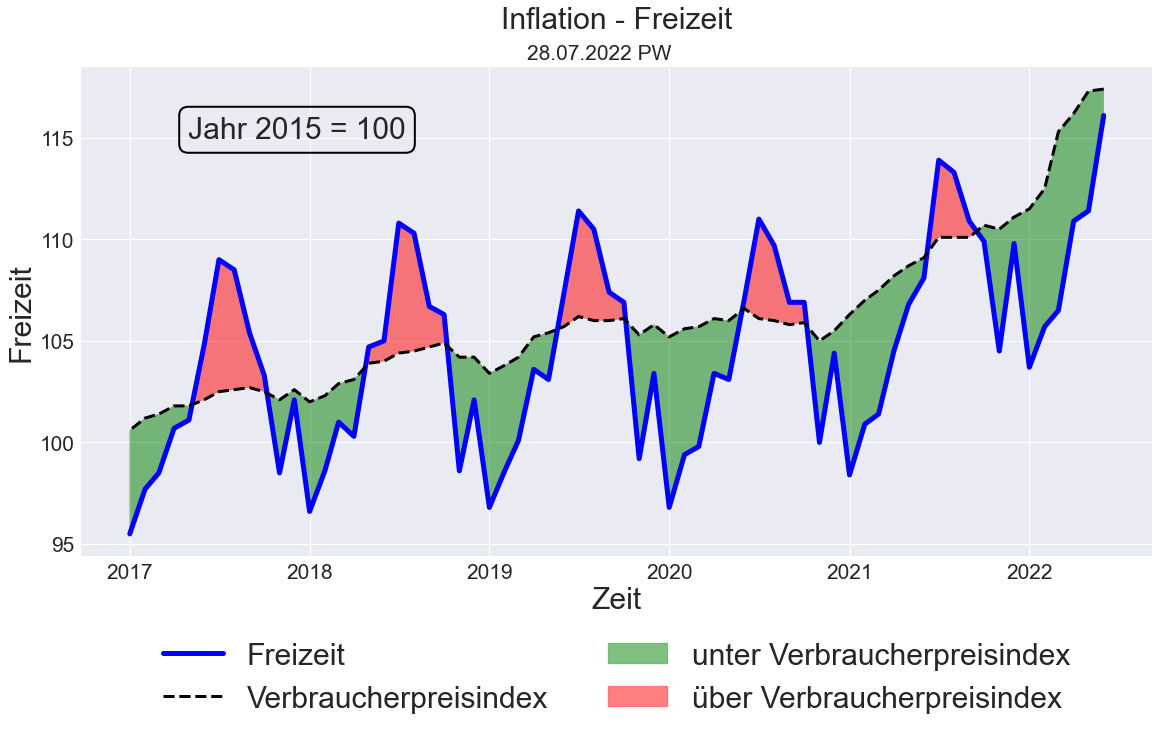

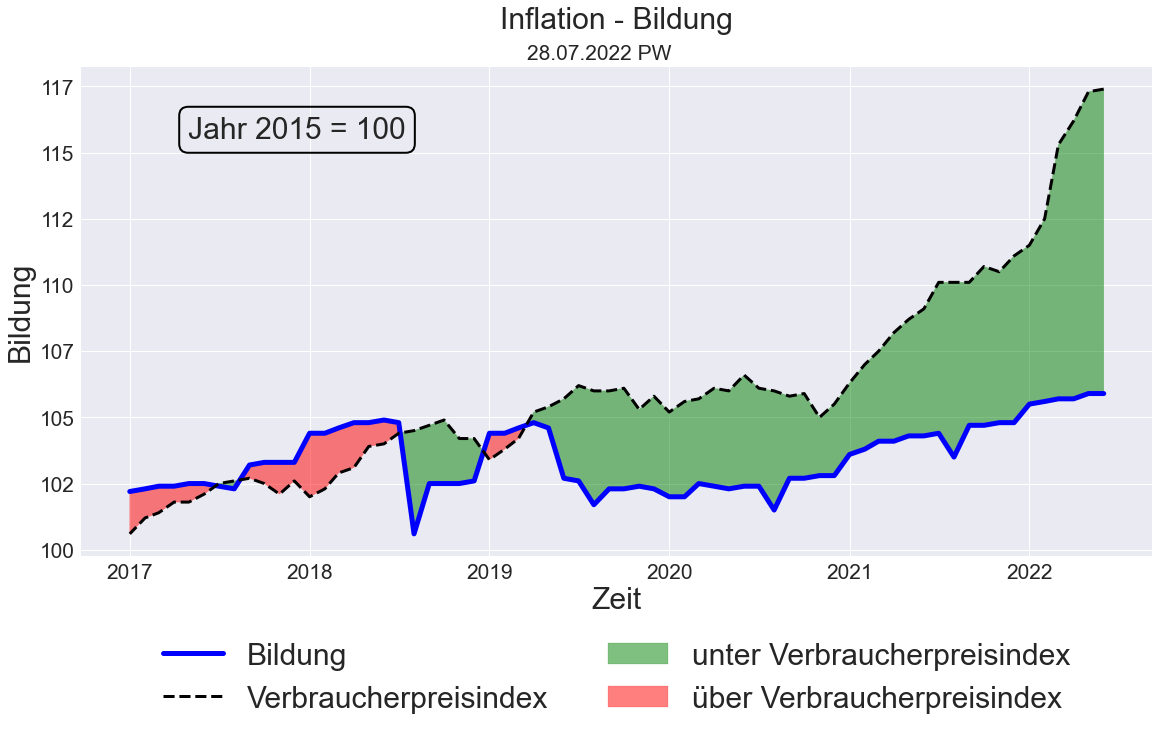

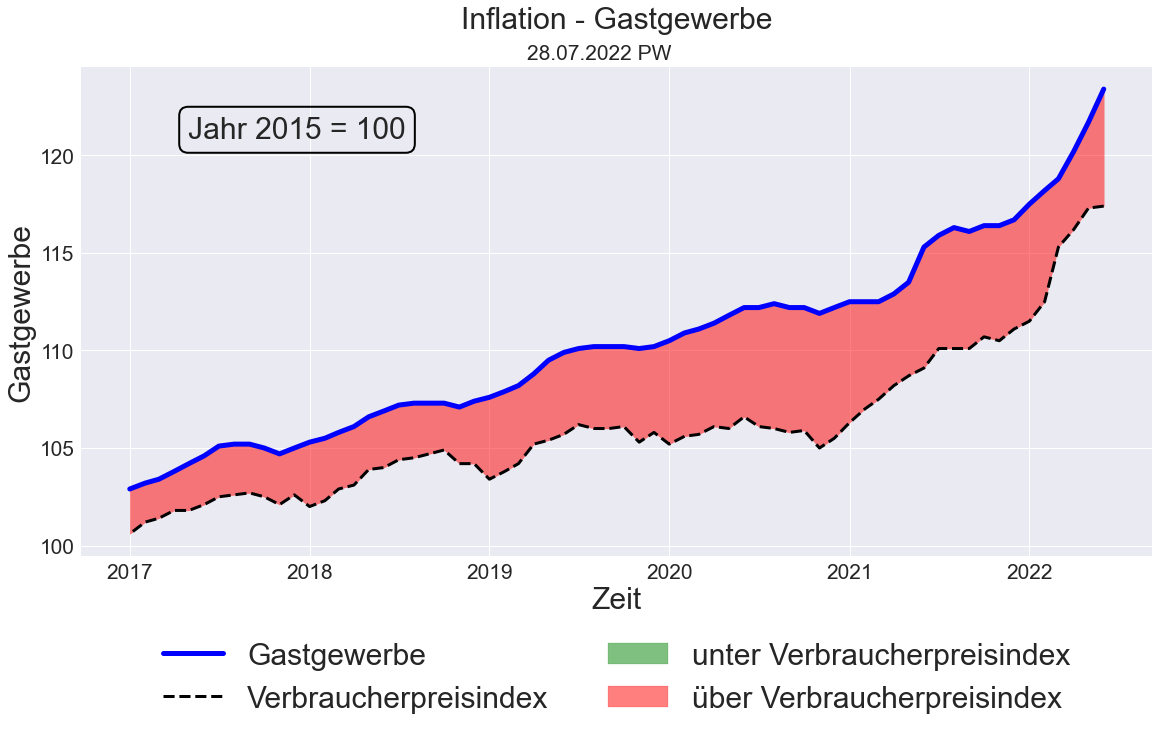

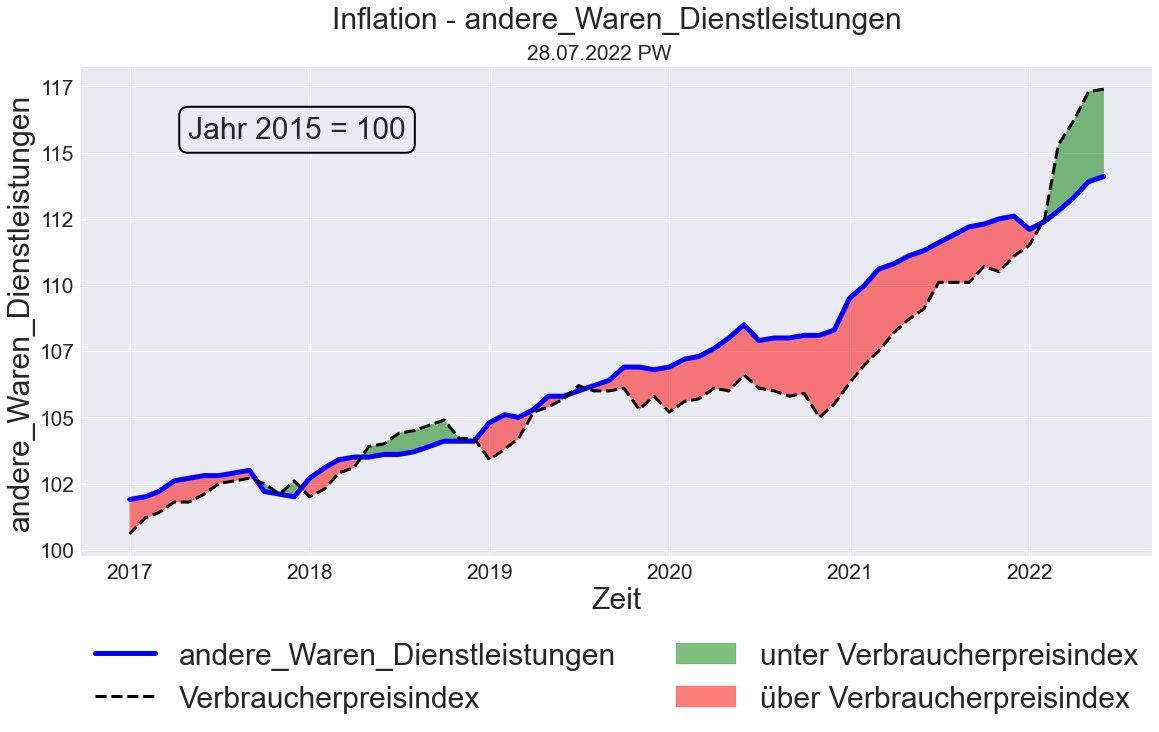

In [87]:
for column in df[['Gesamt','Nahrung', 'Alkohol_Tabak', 'Kleidung', 
                  'Wohnen', 'Haushalt', 'Gesundheit', 'Verkehr', 
                  'Post_Internet', 'Freizeit', 'Bildung', 'Gastgewerbe', 'andere_Waren_Dienstleistungen']]:
    title = column
    print(column)
    # print(df[column])

    def y_axis_thousands(x, pos):
        # 'The two args are the value and tick position'
        return '{:0,d}'.format(int(x)).replace(",", ".")

    plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(16*1.2, 9))
    formatter = FuncFormatter(y_axis_thousands)
    ax.yaxis.set_major_formatter(formatter)
    plt.grid(True)


    plt.plot(df.Datum, df[f'{title}'], marker='', linestyle='-',
             color="blue", linewidth=5, markersize=5, label=title)
    
    plt.plot(df.Datum, df['Gesamt'], marker='', linestyle='--',
             color="black", linewidth=3, label=indexart, markersize=5)
    
    plt.fill_between(df.Datum, df['Gesamt'], df[f'{title}'], color='green', alpha=0.5,
                    label='unter Verbraucherpreisindex', interpolate=True,
                    where = df['Gesamt'] > df[f'{title}'])
    
    plt.fill_between(df.Datum, df['Gesamt'], df[f'{title}'], color='red', alpha=0.5,
                    label='über Verbraucherpreisindex', interpolate=True,
                    where = df['Gesamt'] < df[f'{title}'])
    
    plt.legend(loc='upper center',
               bbox_to_anchor=(0.5, -0.12),
               fancybox=True,
               shadow=True,
               ncol=2,
               fontsize=size * 1)

    plt.xticks(fontsize=size * 0.7, rotation=0)
    plt.yticks(fontsize=size * 0.7, rotation=0)

    plt.ylabel(title, fontsize=size * 1)
    plt.xlabel('Zeit', fontsize=size * 1)

    plt.title(f'{titel0} - {title}\n', fontsize=size * 1)
    plt.suptitle(f'{today} PW', fontsize=size * 0.7, y=0.915)

    ax.text(0.10, 0.9, "Jahr 2015 = 100", transform=ax.transAxes, fontsize=size, verticalalignment='top',
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.3', lw=2))

    # Diagramm als Bild exporieren und Auflösung definieren  
    plt.savefig(f'{pfad}{indexart} {title}.png', dpi=300, bbox_inches='tight')